In [2]:
import sys

import matplotlib.pyplot as plt
import json

import numpy as np

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

# try:
#     from private.lyap import lyap_r, lyap_e, corr_dim
# except:
#     from nolds import lyap_r, lyap_e, corr_dim

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:

# get data
with open("./resources/symb_train_test_data.json", "r") as file:
    all_train_test = json.load(file)

## Make training data

In [ ]:
import sys
import json
import os
import numpy as np


from dysts.base import get_attractor_list
from dysts.analysis import sample_initial_conditions
import dysts.flows

n_train = 150

all_train_test = dict()
for i, equation_name in enumerate(get_attractor_list()):
    
    all_train_test[equation_name] = dict()
    model = getattr(dysts.flows, equation_name)()
    
    np.random.seed(0)
    ic_train, ic_test = sample_initial_conditions(model, 2, traj_length=1000, pts_per_period=30)
    
    model.ic = ic_train
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    X_train, y_train = sol, dsol
    t_train = tvals

    model.ic = ic_test
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    X_test, y_test = sol, dsol
    t_test = tvals
    
    all_train_test[equation_name]["X_train"] = X_train.tolist()
    all_train_test[equation_name]["X_test"] = X_test.tolist()
    all_train_test[equation_name]["y_train"] = y_train.tolist()
    all_train_test[equation_name]["y_test"] = y_test.tolist()
    all_train_test[equation_name]["t_train"] = t_train.tolist()
    all_train_test[equation_name]["t_test"] = t_test.tolist()
    
    np.any(np.isnan(X_test)) or np.any(np.isnan(X_train))
    
# with open("./resources/symb_train_test_data.json", 'w') as file:
#     json.dump(all_train_test, file, indent=4)

In [ ]:
pip install pysr


# Learn equations
equations = pysr(
    X,
    y,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

In [4]:
help(model.fit)

Help on method fit in module dsr.task.regression.sklearn:

fit(X, y) method of dsr.task.regression.sklearn.DeepSymbolicRegressor instance



## Symbolic regression

Available benchmarks

+ Eureqa Python API (could not get this to work)
+ PySR
+ pySINDY
+ AI Feynman 2.0
+ Wolfram (only works on univariate problems)

In [13]:
import pysindy as ps

ModuleNotFoundError: No module named 'pysindy'

/Users/williamgilpin/miniconda3/envs/symb2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/williamgilpin/miniconda3/envs/symb2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/williamgilpin/miniconda3/envs/symb2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/williamgilpin/m

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Aizawa


In [ ]:
## update cores

In [47]:
dd = dict()

dd.update({"tt" : 7})

In [48]:
dd

{'tt': 7}

In [18]:
X_train.shape

(150, 3)

In [19]:
y_train.shape

(150, 3)

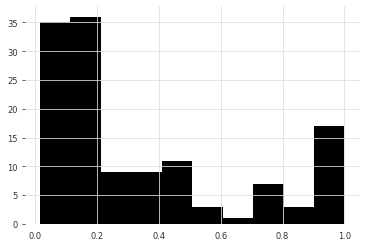

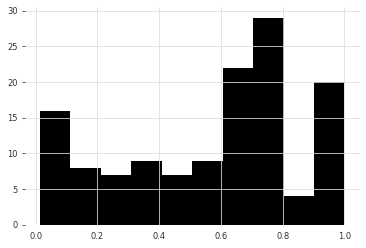

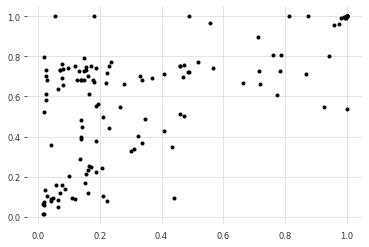

In [60]:
score_vals = np.array([(sym_scores[item]["SINDY-poly"], sym_scores[item]["SINDY-fourier"]) for item in sym_scores])

plt.figure()
plt.hist(score_vals[:, 0])

plt.figure()
plt.hist(score_vals[:, 1])

plt.figure()
plt.plot(*score_vals.T, '.');

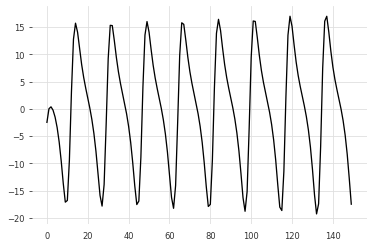

In [75]:
plt.plot(y_train[:, 1])

In [43]:
from pysr import pysr, best_callable

operator_list = [
            "cos",
            "exp",
            "sin",
            "log",
            "tanh",
            "inv(x) = 1/x",
        ]
# base operators +, −, ×, ÷,sin, cos, exp, log, x
pysr_opts = {
    "populations" : 3,  # number of workers, defaults to 20
    "niterations" : 5,
    "procs": 1, # number of threads
    "delete_tempfiles" : True,
    "verbosity": 0,
    "unary_operators" : operator_list,
    "binary_operators" : ["+", "*", "÷", "-"]
}

models = pysr(
    X_train[:10],
    y_train[:10, i],
    **pysr_opts
)
# print(best(equations))

y_test_pred = best_callable(models)(X_test)
# plt.plot(best_callable(equations)(y_test))


In [39]:
# try 100 points

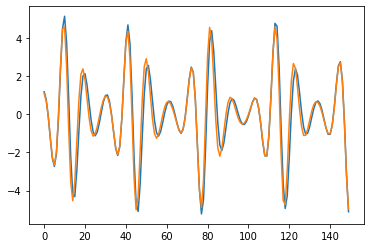

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_callable(equations)(X_test))
plt.plot(y_test[:, i])

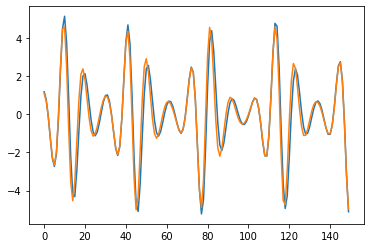

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_callable(equations)(X_test))
plt.plot(y_test[:, i])

In [29]:
equations[equations.score == equations.score.max()]["lambda_format"]

3    PySRFunction(X=>x0 - 3.5865989*x1)
Name: lambda_format, dtype: object

In [25]:
equations["score"]

0    0.000000
1    1.236611
2    0.037664
3    4.657180
4    0.082358
5    0.396391
6    0.006367
7    0.017575
Name: score, dtype: float64

In [23]:
equations#.lambda_format

,Complexity,MSE,score,Equation,sympy_format,lambda_format
0,1,2.714743,0.000000,0.18005764,0.180057640000000,PySRFunction(X=>0.180057640000000)
1,3,0.228887,1.236611,(x1 * -3.2937198),-3.2937198*x1,PySRFunction(X=>-3.2937198*x1)
2,4,0.220427,0.037664,(sin(x1) * -3.5874171),-3.5874171*sin(x1),PySRFunction(X=>-3.5874171*sin(x1))
3,5,0.002093,4.657180,((x1 * -3.5865989) + x0),x0 - 3.5865989*x1,PySRFunction(X=>x0 - 3.5865989*x1)
4,6,0.001927,0.082358,((x1 * -3.5550137) + sin(x0)),-3.5550137*x1 + sin(x0),PySRFunction(X=>-3.5550137*x1 + sin(x0))
5,7,0.001296,0.396391,(((x1 * -3.5874171) + -0.028219834) + x0),x0 - 3.5874171*x1 - 0.028219834,PySRFunction(X=>x0 - 3.5874171*x1 - 0.028219834)
6,12,0.001256,0.006367,(inv(inv(x1) * -0.24654017) + ((tanh(x1) * 0.5...,x0 + inv(-0.24654017*inv(x1)) + 0.55652875*tan...,PySRFunction(X=>x0 + inv(-0.24654017*inv(x1)) ...
7,13,0.001234,0.017575,(inv(inv(x1) * -0.24564007) + ((sin(sin(x1)) *...,x0 + inv(-0.24564007*inv(x1)) + 0.5780935*sin(...,PySRFunction(X=>x0 + inv(-0.24564007*inv(x1)) ...


## nODEs

In [4]:
y_train.shape

(150, 3)